# Lecture 21 - LINEAR DATA FITTING WITH UNCERTANTIES - HW 9

As scientists one of our many checks is to fit data to models.  Here, we will begin first by learning how to fit data with uncertanties to a linear fit (slope and intercept, and uncertanties) by using the python `scipy` module. 

In [38]:
#standard importing
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as opt

In [39]:
#Read in the data to a numpy array
data = np.genfromtxt("LinearFit_data.txt", names=True, dtype=None)

# print out all columns we just got for free
data.dtype

dtype([('X', '<f8'), ('Y', '<f8'), ('Y_ERR', '<f8'), ('Z', '<f8'), ('Z_ERR', '<f8')])

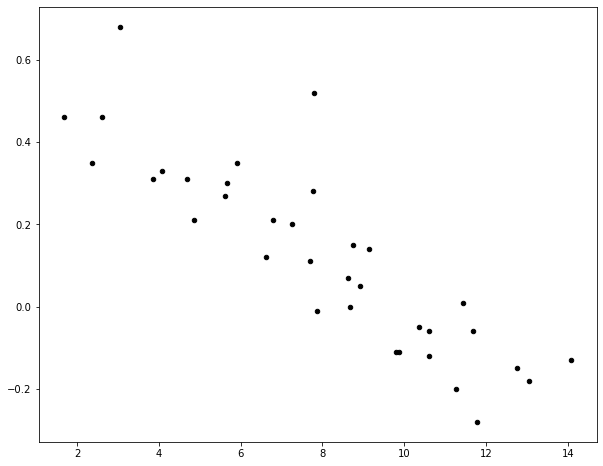

In [40]:
#First let's see what this data looks like
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='black')

# Cool! The data actually looks pretty linear so we can assume the function we are fitting *is* linear

In [41]:
# let's make a linear function the normal way
def linear(x, m, b):
    return m * x + b

raw:  -0.061902193399352975 0.6174204495463552
raw:  [ 3.63943119e-05 -2.88586096e-04] [-0.00028859  0.0026655 ]


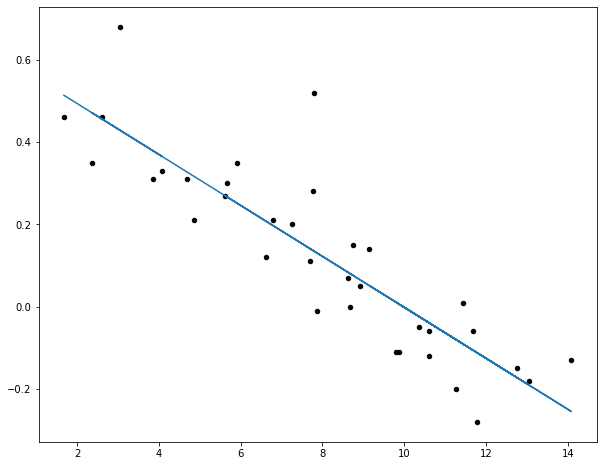

In [42]:
# let's do a linear fit to the data

popt, pcov = opt.curve_fit(linear, data['X'], data['Y'])
print("raw: ", *popt)
print("raw: ", *pcov)


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='black')
ax.plot(data['X'],linear(data['X'], *popt))


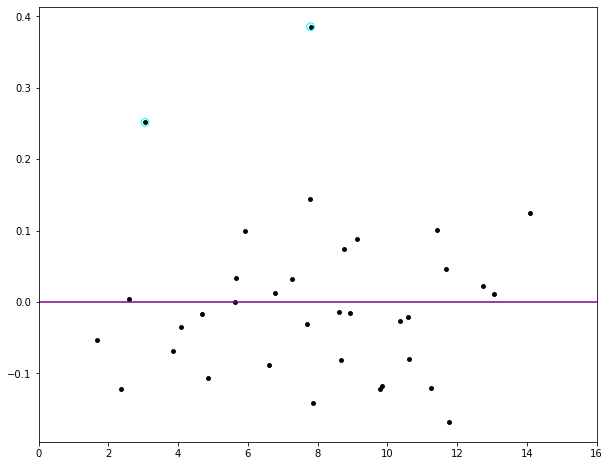

In [43]:
#Let's look into wich data are way off the fit.

residual = data['Y']-linear(data['X'],*popt)
x = np.linspace(0,20,1000)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(data['X'],residual,s=15,c='black')
ax.plot(x,x*0.0,color='purple')
ax.set_xlim(0,16)

outlier = np.absolute(residual)>0.20
ax.scatter(data['X'][outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')


raw:  -0.061902193399352975 0.6174204495463552
outliers accounted for:  -0.05813182372356069 0.5703220760035745


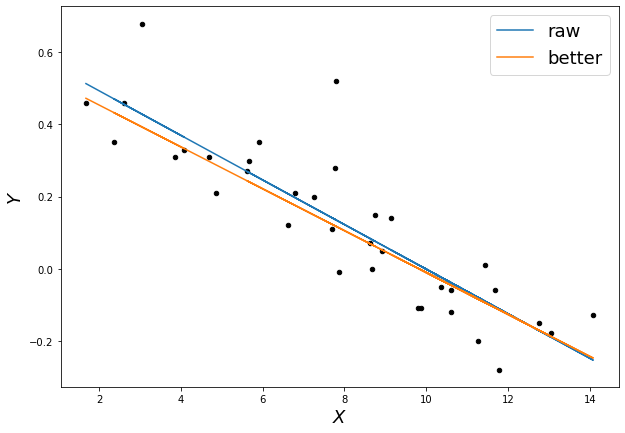

In [44]:
# our values for the raw data above:
# slope:    -0.058187
# intercept: 0.565351
popt, pcov = opt.curve_fit(linear, data['X'], data['Y'])
print("raw: ", *popt)

# we can use curve_fit to de-weight outliers automatically

# note, result is dependent on choice of loss function
# need to see method to trf in order to use least_squares instead of leastsq
popt_clean, pcov = opt.curve_fit(linear, data['X'], data['Y'], method='trf', 
                                 loss='arctan', f_scale=0.20)
print("outliers accounted for: ", *popt_clean)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='black',zorder=2)
# cleaner error bars than last time, play around with the parameters
#ax.errorbar(data['X'],data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
#            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with our fits
ax.plot(data['X'],linear(data['X'], *popt), label='raw')
ax.plot(data['X'],linear(data['X'], *popt_clean), label='better')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()

#Treating the two points up top as outliers leads to a better overall fit

-0.056065582969938695 0.5500877320339043


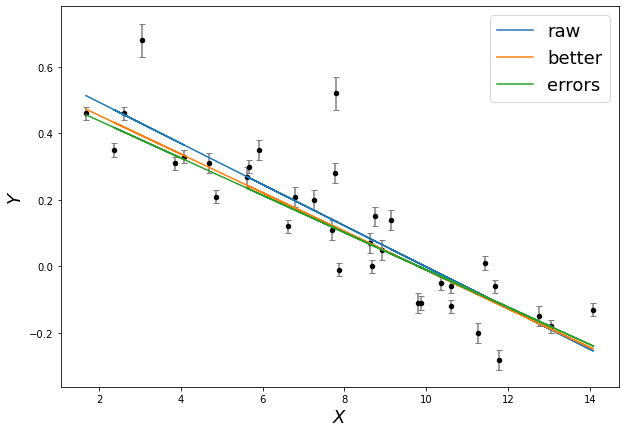

In [45]:
# lets account for the errors
# by pasing sigma, scipy knows to weight data according to their errors 
# naturally, sigma is expected to be the same size and correspond to y
# notice: this only accounts for y error
popt_err, pcov = opt.curve_fit(linear, data['X'], data['Y'], sigma=data['Y_ERR'])
print(*popt_err)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='black',zorder=2)
ax.errorbar(data['X'],data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with out fits
ax.plot(data['X'],linear(data['X'], *popt), label='raw')
ax.plot(data['X'],linear(data['X'], *popt_clean), label='better')
ax.plot(data['X'],linear(data['X'], *popt_err), label='errors')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()

mean slope: -0.0618, mean intercept: 0.6166


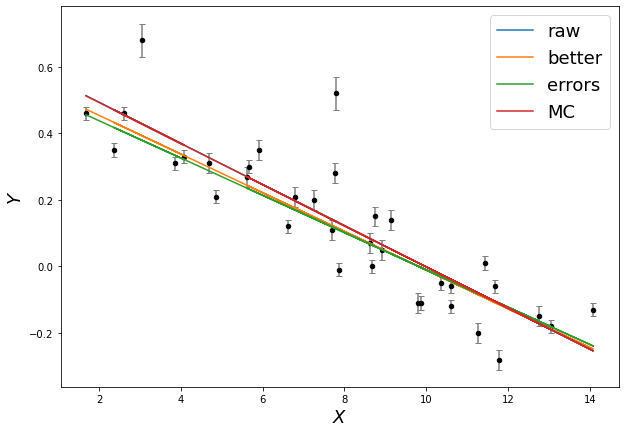

In [46]:
# Does this accurately explore the parameter space though?
# And what is the uncertainty on our data?
# What if we had x error bars?

# we'll explore a method utilizing the common "monte carlo" approach
def mcFit(x, y, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weights = np.random.randn(len(y))

        y_adj = y + y_err*weights
        x_adj = x  

        params, other = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return slopes, y_ints

slope, intercept = mcFit(data['X'], data['Y'], data['Y_ERR'])

print('mean slope: {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slope), np.mean(intercept)))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(data['X'], data['Y'],s=20,c='black',zorder=2)
ax.errorbar(data['X'], data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with our fits
ax.plot(data['X'], linear(data['X'], *popt), label='raw')
ax.plot(data['X'], linear(data['X'], *popt_clean), label='better')
ax.plot(data['X'], linear(data['X'], *popt_err), label='errors')
ax.plot(data['X'], linear(data['X'], np.mean(slope), np.mean(intercept)), label='MC')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()

(array([ 3.,  4., 10., 21., 23., 47., 56., 65., 55., 69., 55., 27., 24.,
        17., 13.,  5.,  3.,  1.,  0.,  2.]),
 array([-0.06518672, -0.0647891 , -0.06439148, -0.06399386, -0.06359625,
        -0.06319863, -0.06280101, -0.06240339, -0.06200577, -0.06160815,
        -0.06121053, -0.06081291, -0.06041529, -0.06001767, -0.05962005,
        -0.05922243, -0.05882481, -0.05842719, -0.05802957, -0.05763196,
        -0.05723434]),
 <BarContainer object of 20 artists>)

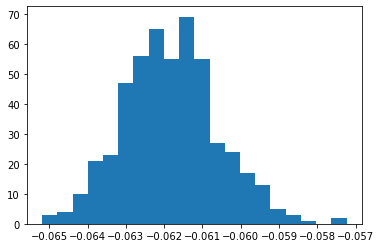

In [47]:
plt.hist(slope, bins=20)
#Always make sure to include error bars in professional research!

In [48]:
# oh right, those outliers.

mask = data['Y'] < 0.5 

xdat = data['X'][mask]
ydat = data['Y'][mask]
ydat_err = data['Y_ERR'][mask]

print("data size: ", len(xdat))

slope, intercept = mcFit(xdat, ydat, ydat_err)

print('slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slope), np.std(slope),
                                                                          np.mean(intercept)))
print("\n")
# lets discuss monte carlo methods a little
for i in range(20):
    slope, intercept = mcFit(xdat, ydat, ydat_err)
    print("slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}".format(np.mean(slope), np.std(slope), 
                                                                          np.mean(intercept)))

# so what we see that our answer changes slightly, but its within the standard deviation
# of each set of measurements. So we can quote a reliable answer, with a reliable uncertainty

data size:  33
slope: -0.0578 $\pm$ 0.0013, mean intercept: 0.5652


slope: -0.0578 $\pm$ 0.0012, mean intercept: 0.5648
slope: -0.0578 $\pm$ 0.0012, mean intercept: 0.5648
slope: -0.0578 $\pm$ 0.0012, mean intercept: 0.5651
slope: -0.0578 $\pm$ 0.0013, mean intercept: 0.5653
slope: -0.0579 $\pm$ 0.0012, mean intercept: 0.5653
slope: -0.0579 $\pm$ 0.0012, mean intercept: 0.5656
slope: -0.0578 $\pm$ 0.0012, mean intercept: 0.5649
slope: -0.0577 $\pm$ 0.0012, mean intercept: 0.5644
slope: -0.0579 $\pm$ 0.0011, mean intercept: 0.5660
slope: -0.0579 $\pm$ 0.0012, mean intercept: 0.5655
slope: -0.0579 $\pm$ 0.0013, mean intercept: 0.5658
slope: -0.0578 $\pm$ 0.0012, mean intercept: 0.5654
slope: -0.0579 $\pm$ 0.0013, mean intercept: 0.5651
slope: -0.0579 $\pm$ 0.0012, mean intercept: 0.5658
slope: -0.0578 $\pm$ 0.0012, mean intercept: 0.5650
slope: -0.0580 $\pm$ 0.0013, mean intercept: 0.5663
slope: -0.0577 $\pm$ 0.0012, mean intercept: 0.5648
slope: -0.0578 $\pm$ 0.0012, mean intercept: 0.

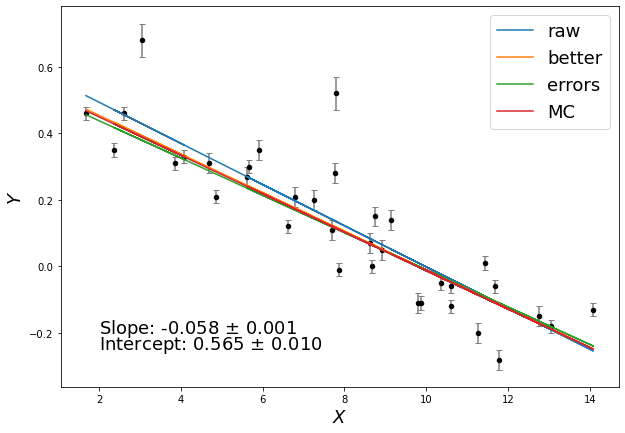

In [49]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(data['X'], data['Y'],s=20,c='black',zorder=2)
ax.errorbar(data['X'], data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

slope, intercept = mcFit(xdat, ydat, ydat_err)

# along with out fits
ax.plot(data['X'], linear(data['X'], *popt), label='raw')
ax.plot(data['X'], linear(data['X'], *popt_clean), label='better')
ax.plot(data['X'], linear(data['X'], *popt_err), label='errors')
ax.plot(data['X'], linear(data['X'], np.mean(slope), np.mean(intercept)), label='MC')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

ax.text(2, -0.2, "Slope: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slope), np.std(slope)), fontsize=18)
ax.text(2, -0.25, "Intercept: {:5.3f} $\pm$ {:5.3f}".format(np.mean(intercept), np.std(intercept)), fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()

## Homework #10

**REMINDER:** *All coding assignment will be turned in as .ipynb files, to the same PHYS_X0223 repository on GitHub.*   
*They should be turned in with the following naming:*
    
    Lastname_Firstinitial_24_HW10.ipynb

### Problem 1:
We can't know the x data perfectly suppose the data have uniform x errors of 0.5 use the MC technique to estimate the slope *AND* the uncertainty taking into account these errors.



In [150]:
def mcFit(x, y, x_err, y_err):    #Added x_err
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        xweights = np.random.randn(len(x))
        yweights = np.random.randn(len(y))
        
        #data['X_ERR'][mask]

        y_adj = y + y_err*yweights
        x_adj = x + x_err*xweights #New

        params, other = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
        
    return slopes, y_ints #Make sure return line is present! Otherwise code will return an error instead
        

# code here
mask = data['Y'] < 0.5 

#X_ERR = []

xdat = data['X'][mask]
ydat = data['Y'][mask]
xdat_err = 0.5 #New
ydat_err = data['Y_ERR'][mask]

print("data size: ", len(xdat))

slope, intercept = mcFit(xdat, ydat, xdat_err, ydat_err) #Added xdat_err

print('slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slope), np.std(slope),
                                                                          np.mean(intercept)))
print("\n")
# lets discuss monte carlo methods a little
for i in range(20):
    slope, intercept = mcFit(xdat, ydat, xdat_err, ydat_err)
    print("slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}".format(np.mean(slope), np.std(slope), 
                                                                          np.mean(intercept)))

data size:  33
slope: -0.0567 $\pm$ 0.0021, mean intercept: 0.5566


slope: -0.0564 $\pm$ 0.0021, mean intercept: 0.5537
slope: -0.0566 $\pm$ 0.0020, mean intercept: 0.5560
slope: -0.0566 $\pm$ 0.0020, mean intercept: 0.5553
slope: -0.0567 $\pm$ 0.0021, mean intercept: 0.5557
slope: -0.0566 $\pm$ 0.0021, mean intercept: 0.5549
slope: -0.0568 $\pm$ 0.0020, mean intercept: 0.5568
slope: -0.0568 $\pm$ 0.0020, mean intercept: 0.5569
slope: -0.0566 $\pm$ 0.0022, mean intercept: 0.5554
slope: -0.0565 $\pm$ 0.0021, mean intercept: 0.5548
slope: -0.0565 $\pm$ 0.0021, mean intercept: 0.5544
slope: -0.0566 $\pm$ 0.0021, mean intercept: 0.5552
slope: -0.0565 $\pm$ 0.0020, mean intercept: 0.5547
slope: -0.0567 $\pm$ 0.0020, mean intercept: 0.5563
slope: -0.0566 $\pm$ 0.0021, mean intercept: 0.5548
slope: -0.0564 $\pm$ 0.0021, mean intercept: 0.5545
slope: -0.0565 $\pm$ 0.0020, mean intercept: 0.5551
slope: -0.0566 $\pm$ 0.0021, mean intercept: 0.5553
slope: -0.0565 $\pm$ 0.0020, mean intercept: 0.

In [88]:
print(xdat_err)

0.5


### Problem 2:
Repeat problem #1 , but change the errors INCREASE as we move away from X = 8 (as they do) to be precise: suppose X_ERR = |x - 8| /10, e.g. it increases by .1 per unit.

Plot both slopes (Problem 1 & 2). How does the fit change? 

0.5




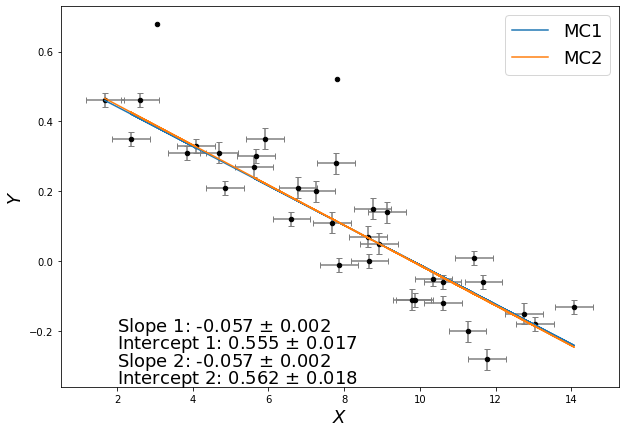

For Problem 2, the slope is slightly steeper than for Problem 1 (The y-values decline faster). However, the intercept for Problem 2 is slightly higher.


In [189]:
# code here

def mcFit(x, y, x_err, y_err):    #Added x_err
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        xweights = np.random.randn(len(x))
        yweights = np.random.randn(len(y))
        
        #data['X_ERR'][mask]

        y_adj = y + y_err*yweights
        x_adj = x + x_err*xweights #New

        params, other = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
        
    return slopes, y_ints #Make sure return line is present! Otherwise code will return an error instead
        

# code here
mask = data['Y'] < 0.5 

#X_ERR = []

xdat = data['X'][mask]
ydat = data['Y'][mask]
xdat_err1 = 0.5
xdat_err2 = (abs(xdat-8))/10 #Modified from problem 1; must be xdat, not x.
ydat_err = data['Y_ERR'][mask]
#data['X_ERR'][mask] = xdat_err
print(xdat_err)

#print("data size: ", len(xdat))

slope, intercept = mcFit(xdat, ydat, xdat_err, ydat_err) #Added xdat_err

#print('slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slope), np.std(slope),
#                                                                          np.mean(intercept)))
print("\n")
# lets discuss monte carlo methods a little
#for i in range(20):
#    slope, intercept = mcFit(xdat, ydat, xdat_err, ydat_err)
#    print("slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}".format(np.mean(slope), np.std(slope), 
#                                                                          np.mean(intercept)))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(data['X'], data['Y'],s=20,c='black',zorder=2)
ax.errorbar(xdat, ydat, xerr=xdat_err, yerr=ydat_err, c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

slope1, intercept1 = mcFit(xdat, ydat, xdat_err1, ydat_err)
slope2, intercept2 = mcFit(xdat, ydat, xdat_err2, ydat_err)

# along with out fits
ax.plot(data['X'], linear(data['X'], np.mean(slope1), np.mean(intercept1)), label='MC1')
ax.plot(data['X'], linear(data['X'], np.mean(slope2), np.mean(intercept2)), label='MC2')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

ax.text(2, -0.2, "Slope 1: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slope1), np.std(slope1)), fontsize=18)
ax.text(2, -0.25, "Intercept 1: {:5.3f} $\pm$ {:5.3f}".format(np.mean(intercept1), np.std(intercept1)), fontsize=18)
ax.text(2, -0.3, "Slope 2: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slope2), np.std(slope2)), fontsize=18)
ax.text(2, -0.35, "Intercept 2: {:5.3f} $\pm$ {:5.3f}".format(np.mean(intercept2), np.std(intercept2)), fontsize=18)


plt.legend(loc='best', fontsize=18)
plt.show()

print('For Problem 2, the slope is slightly steeper than for Problem 1 (The y-values decline faster). However, the intercept for Problem 2 is slightly higher.')

### Problem 3: 
Repeat problem 1 & 2, but now anaylze for X vs. Z data, including both uniform 0.5 and X_ERR = |x - 8| /10 uncertainties.

data size:  35
slope: +0.0029 $\pm$ 0.0037, mean intercept: -0.0240


slope: +0.0030 $\pm$ 0.0035, mean intercept: -0.0246
slope: +0.0028 $\pm$ 0.0036, mean intercept: -0.0226
slope: +0.0029 $\pm$ 0.0034, mean intercept: -0.0235
slope: +0.0029 $\pm$ 0.0034, mean intercept: -0.0233
slope: +0.0027 $\pm$ 0.0035, mean intercept: -0.0217
slope: +0.0030 $\pm$ 0.0035, mean intercept: -0.0243
slope: +0.0027 $\pm$ 0.0034, mean intercept: -0.0218
slope: +0.0030 $\pm$ 0.0035, mean intercept: -0.0237
slope: +0.0028 $\pm$ 0.0034, mean intercept: -0.0232
slope: +0.0028 $\pm$ 0.0034, mean intercept: -0.0220
slope: +0.0030 $\pm$ 0.0033, mean intercept: -0.0242
slope: +0.0027 $\pm$ 0.0035, mean intercept: -0.0216
slope: +0.0027 $\pm$ 0.0035, mean intercept: -0.0215
slope: +0.0028 $\pm$ 0.0034, mean intercept: -0.0226
slope: +0.0027 $\pm$ 0.0035, mean intercept: -0.0221
slope: +0.0029 $\pm$ 0.0036, mean intercept: -0.0224
slope: +0.0025 $\pm$ 0.0035, mean intercept: -0.0217
slope: +0.0025 $\pm$ 0.0036, 

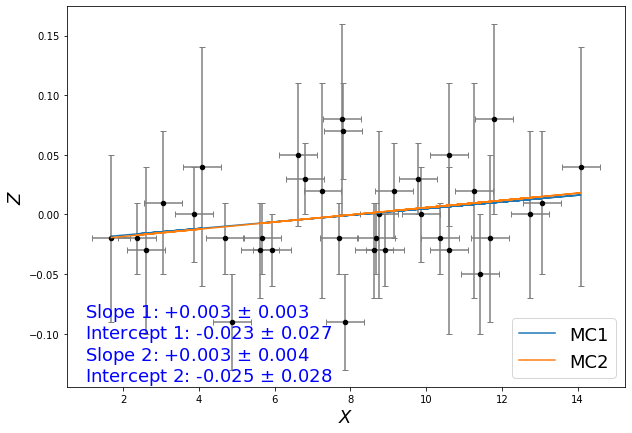

In [198]:
import math
import numpy as np

# code here
#PROBLEM 1 FOR x vs z
def mcFit(x, z, x_err, z_err):    #Added x_err
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        xweights = np.random.randn(len(x))
        zweights = np.random.randn(len(z))
        
        #data['X_ERR'][mask]

        z_adj = z + z_err*zweights
        x_adj = x + x_err*xweights #New

        params, other = opt.curve_fit(linear, x_adj, z_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
        
    return slopes, y_ints #Make sure return line is present! Otherwise code will return an error instead
        

# code here
mask = data['Z'] < 0.5 

#X_ERR = []

xdat = data['X'][mask]
zdat = data['Z'][mask]
xdat_err1 = 0.5 #New
xdat_err2 = (abs(xdat-8))/10
zdat_err = data['Z_ERR'][mask]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)


ax.scatter(data['X'], data['Z'],s=20,c='black',zorder=2)
ax.errorbar(xdat, zdat, zdat_err, xdat_err, c='tab:gray', #Second axis must have its error listed first
            fmt='.', markersize=1, capsize=3 ,zorder=0)


slope1, intercept1 = mcFit(xdat, zdat, xdat_err1, zdat_err)
slope2, intercept2 = mcFit(xdat, zdat, xdat_err2, zdat_err)

print("data size: ", len(xdat))

print('slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slope), np.std(slope),
                                                                          np.mean(intercept)))
print("\n")
# lets discuss monte carlo methods a little
for i in range(20):
    slope, intercept = mcFit(xdat, zdat, xdat_err, zdat_err)
    print("slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}".format(np.mean(slope), np.std(slope), 
                                                                          np.mean(intercept)))
    
# along with out fits
ax.plot(data['X'], linear(data['X'], np.mean(slope1), np.mean(intercept1)), label='MC1')
ax.plot(data['X'], linear(data['X'], np.mean(slope2), np.mean(intercept2)), label='MC2')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Z$', fontsize=18)

ax.text(1, -0.086, "Slope 1: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slope1), np.std(slope1)), fontsize=18, c='blue')
ax.text(1, -0.104, "Intercept 1: {:5.3f} $\pm$ {:5.3f}".format(np.mean(intercept1), np.std(intercept1)), fontsize=18, c='blue')
ax.text(1, -0.122, "Slope 2: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slope2), np.std(slope2)), fontsize=18, c='blue')
ax.text(1, -0.140, "Intercept 2: {:5.3f} $\pm$ {:5.3f}".format(np.mean(intercept2), np.std(intercept2)), fontsize=18, c='blue')

plt.legend(loc='best', fontsize=18)
plt.show()

#Note: Errors are particularly large relative to the lower and upper values for z. MC2 has a slightly steeper slope.

In [187]:
zdat_err

array([0.07, 0.1 , 0.04, 0.07, 0.03, 0.06, 0.03, 0.04, 0.03, 0.03, 0.03,
       0.09, 0.08, 0.07, 0.06, 0.04, 0.04, 0.03, 0.04, 0.03, 0.03, 0.05,
       0.04, 0.07, 0.1 , 0.04, 0.07, 0.03, 0.06, 0.03, 0.09, 0.08, 0.07,
       0.06, 0.04])